### Exemplos de Sinais

Sinal analógico $x_c: \mathbb{R} \rightarrow \mathbb{R}$

Considere que este sinal tenha sido amostrado a uma taxa $f_s$

$$ x[n] = x_c  \Bigg(\frac{n}{f_s}\Bigg) $$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat

In [2]:
M = loadmat('files/HR00001.mat')
x = M['val']
print(x.shape)

(12, 5000)


## Visualização do canal 2

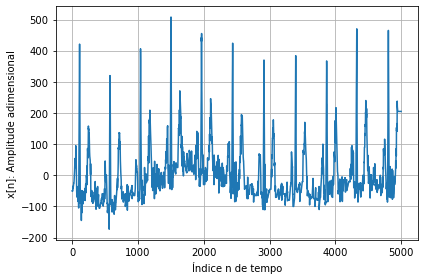

In [3]:
plt.plot(x[1])
plt.xlabel("Índice n de tempo")
plt.ylabel("x[n]: Amplitude adimensional")
plt.grid()
plt.tight_layout()

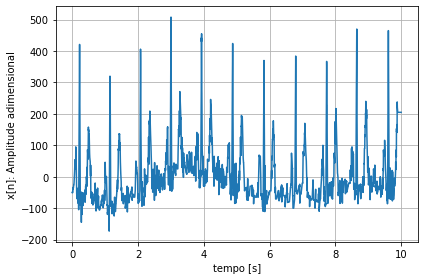

In [4]:
t = np.linspace(0, 10, x.shape[1])

plt.plot(t ,x[1])
plt.xlabel("tempo [s]")
plt.ylabel("x[n]: Amplitude adimensional")
plt.grid()
plt.tight_layout()

In [5]:
t1 = t[2000:3000]
x1 = x[9,2000:3000]

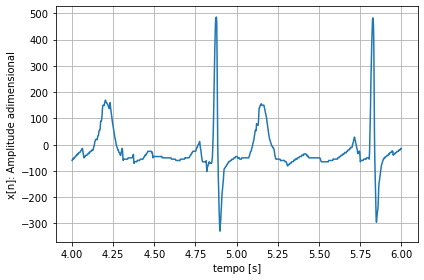

In [6]:
plt.plot(t1 ,x1)
plt.xlabel("tempo [s]")
plt.ylabel("x[n]: Amplitude adimensional")
plt.grid()
plt.tight_layout()

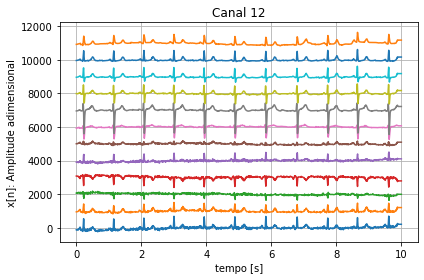

In [7]:
for ch in range(0, 12):
    plt.plot(t, x[ch] + ch *1000) 
plt.title("Canal " + str(ch + 1))
plt.xlabel("tempo [s]")
plt.ylabel("x[n]: Amplitude adimensional")
plt.grid()
plt.tight_layout()

plt.show()

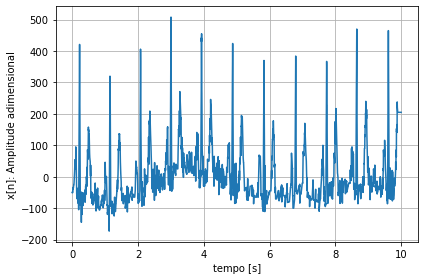

In [8]:
plt.plot(t ,x[1])
plt.xlabel("tempo [s]")
plt.ylabel("x[n]: Amplitude adimensional")
plt.grid()
plt.tight_layout()

In [9]:
x_hat = np.fft.fft(x[2] - x[2].mean())/500
f = np.linspace(-.5, .5, len(x_hat)) * 500

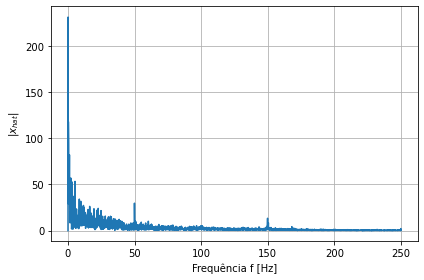

In [10]:
plt.plot(f[len(f)//2:], np.abs(x_hat[:len(f)//2]))
plt.grid()
plt.xlabel("Frequência f [Hz]")
plt.ylabel(r'|$x_{hat}$|')
plt.tight_layout()

In [70]:
from scipy.signal import firwin

# Extração da derivação 2
M = loadmat('files/HR00001.mat')
x = M['val']
x = x[1, :]

# Projeto de um filtro
fs = 500
No = 400
janela = "hamming"
banda_rejeicao1 = np.array([45, 55]) # em hertz
h1 = firwin(No + 1, banda_rejeicao1 / fs * 2, window = janela, pass_zero = "bandstop")

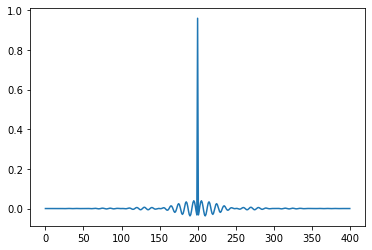

In [39]:
plt.plot(h1)

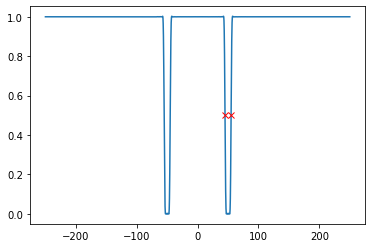

In [44]:
h1_ = np.zeros(10000,)
h1_[:len(h1)] = h1

f_ = np.linspace(-250, 250, 10000)
plt.plot(f_, abs(np.fft.fftshift(np.fft.fft(h1_))))
plt.plot((45, 55),(0.5, 0.5), 'rx')

## Exercício

1. Projetar um filtro reiejta faixa em torno de $150 Hz$
2. Projetar um filtro low pass em $245 Hz$
3. Projetar um filtro high pass e avaliar o valor de $f_c$ e observando o efeito sobre a linha de base
4. Filtrar o canal 2 fazendo a convolução de cada $h$ com o sinal em sequência
5. repetir a avaliação da derivada para detecção do pico R com o sinal filtrado

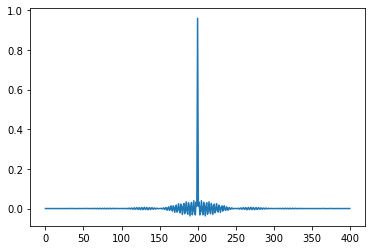

In [41]:
# Filtro rejeita faixa em torno de 150 Hz
banda_rejeicao2 = np.array([145, 155]) # em hertz
h2 = firwin(No + 1, banda_rejeicao2 / fs * 2, window = janela, pass_zero = "bandstop")
plt.plot(h2)

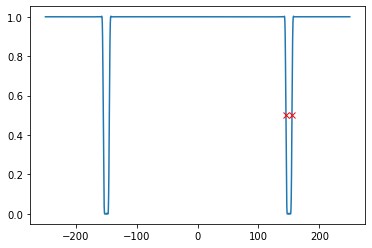

In [45]:
h2_ = np.zeros(10000,)
h2_[:len(h2)] = h2

f_ = np.linspace(-250, 250, 10000)
plt.plot(f_, abs(np.fft.fftshift(np.fft.fft(h2_))))
plt.plot((145, 155),(0.5, 0.5), 'rx')

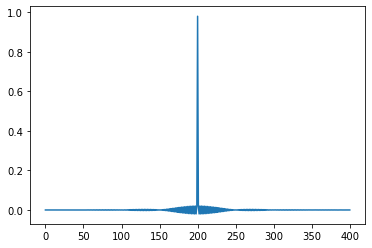

In [43]:
# Filtro low pass com f_c = 245 Hz
banda_rejeicao3 = 245 # em hertz
h3 = firwin(No + 1, banda_rejeicao3 / fs * 2, window = janela, pass_zero = "lowpass")
plt.plot(h3)

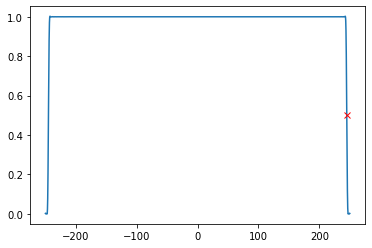

In [46]:
h3_ = np.zeros(10000,)
h3_[:len(h3)] = h3

f_ = np.linspace(-250, 250, 10000)
plt.plot(f_, abs(np.fft.fftshift(np.fft.fft(h3_))))
plt.plot( 245, 0.5, 'rx')

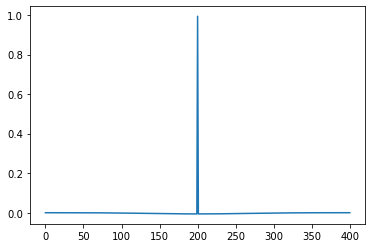

In [81]:
banda_rejeicao4 = 1.5 # em hertz
h4 = firwin(No + 1, banda_rejeicao4 / fs * 2, window = janela, pass_zero = "highpass")
plt.plot(h4)

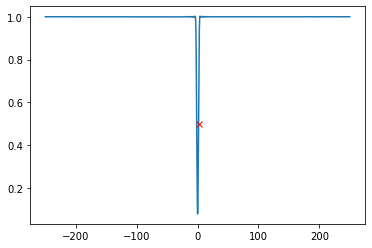

In [82]:
h4_ = np.zeros(10000,)
h4_[:len(h4)] = h4

f_ = np.linspace(-250, 250, 10000)
plt.plot(f_, abs(np.fft.fftshift(np.fft.fft(h4_))))
plt.plot( 1.5, 0.5, 'rx')

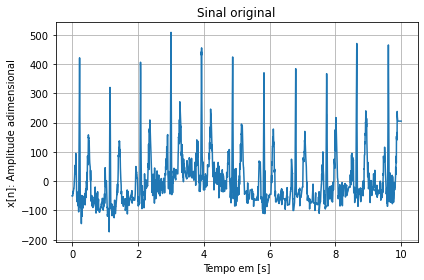

In [83]:
plt.plot(t, x)
plt.xlabel("Tempo em [s]")
plt.ylabel("x[n]: Amplitude adimensional")
plt.title("Sinal original")
plt.grid()
plt.tight_layout()

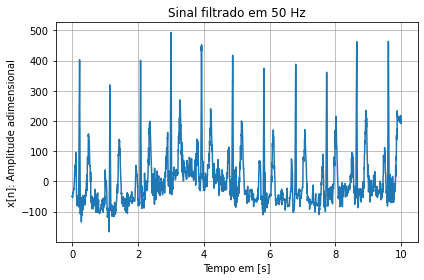

In [84]:
x1 = np.convolve(x, h1, "same")

plt.plot(t, x1)
plt.xlabel("Tempo em [s]")
plt.ylabel("x[n]: Amplitude adimensional")
plt.title("Sinal filtrado em 50 Hz")
plt.grid()
plt.tight_layout()

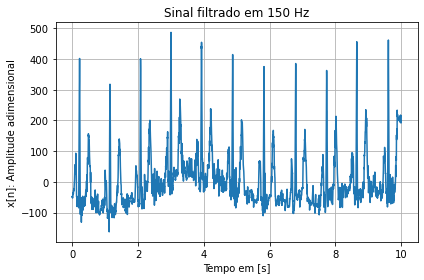

In [85]:
x2 = np.convolve(x1, h2, "same")

plt.plot(t, x2)
plt.xlabel("Tempo em [s]")
plt.ylabel("x[n]: Amplitude adimensional")
plt.title("Sinal filtrado em 150 Hz")
plt.grid()
plt.tight_layout()

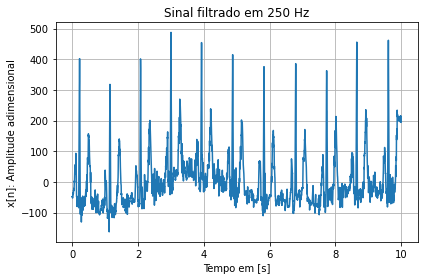

In [86]:
x3 = np.convolve(x2, h3, "same")

plt.plot(t, x3)
plt.xlabel("Tempo em [s]")
plt.ylabel("x[n]: Amplitude adimensional")
plt.title("Sinal filtrado em 250 Hz")
plt.grid()
plt.tight_layout()

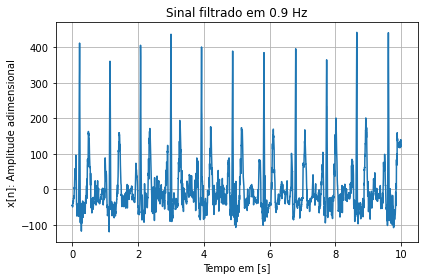

In [91]:
x4 = np.convolve(x3, h4, "same")

plt.plot(t, x4)
plt.xlabel("Tempo em [s]")
plt.ylabel("x[n]: Amplitude adimensional")
plt.title("Sinal filtrado em 0.9 Hz")
plt.grid()
plt.tight_layout()

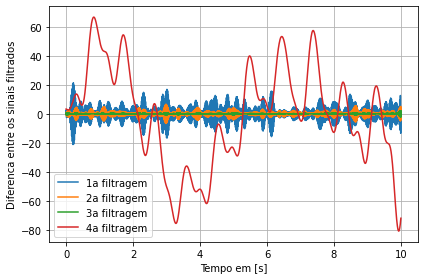

In [90]:
plt.plot(t, x1 - x, label = "1a filtragem")
plt.plot(t, x2 - x1, label = "2a filtragem")
plt.plot(t, x3 - x2, label = "3a filtragem")
plt.plot(t, x4 - x3, label = "4a filtragem")
plt.grid()
plt.xlabel("Tempo em [s]")
plt.ylabel("Diferenca entre os sinais filtrados")
plt.tight_layout()
plt.legend()

In [92]:
x_filtrado = np.copy(x4)

In [100]:
# Começo do algoritmo de detecção do pico QRS

x_diff = np.zeros(len(x_filtrado))

for i in range (1, len(x_filtrado)):
    x_diff[i] = x_filtrado[i] - x_filtrado[i - 1]

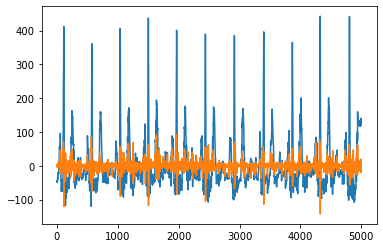

In [104]:
plt.plot(x_filtrado)
plt.plot(x_diff)

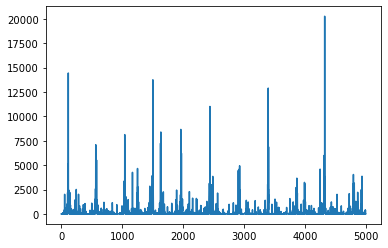

In [106]:
x_squared = np.square(x_diff)

plt.plot(x_squared)

In [183]:
# w = np.ones(50)
# x_mov_ave = np.convolve(x_squared, w, "same")
# x_mov_ave = x_mov_ave/max(x_mov_ave)

x_mov_ave = x_filtrado/max(x_filtrado)

x_peak = []

for i in range(1, len(x_mov_ave) - 1):
    if x_mov_ave[i] > 0.6:
        if x_mov_ave[i] > x_mov_ave[i+1] and x_mov_ave[i] > x_mov_ave[i-1]:
            x_peak.append(i)

In [184]:
x_peak = np.array(x_peak).T

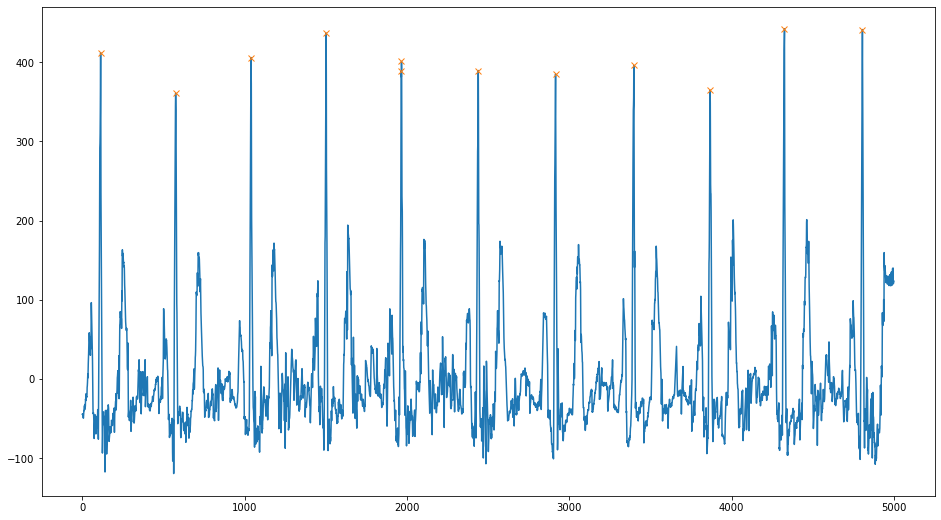

In [187]:
plt.figure(figsize=(16,9))
plt.plot(x_filtrado)
plt.plot(x_peak ,x_filtrado[x_peak], 'x')
